In [1]:
##### Import all necessity functions for Machine Learning #####
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
import zipfile
import cv2
import os
import re
import nltk
import random
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
from functools import reduce
from itertools import chain
from wordcloud import WordCloud
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

##### Download keras #####
!pip install keras

##### Remove all warnings #####
import warnings
warnings.filterwarnings("ignore")

##### Import all necessity functions for Neural Network #####
import tensorflow as tf
from keras.models import Sequential, Model
from keras.utils import plot_model
from keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU,  Embedding
from keras.activations import tanh, relu, sigmoid, softmax, swish
from keras.regularizers import L1, L2, L1L2
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber, BinaryCrossentropy
import keras.utils as image
from google.colab.patches import cv2_imshow
from keras.utils import plot_model

##### Plotting the confusion matrix #####
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

###### NLP Libraries ######

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

###### Download functions for nltk ######

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

####Import the dataset

In [2]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#### Convert this target class into neumrical representation
df.loc[:, 'Species'] = df.loc[:, 'Species'].\
      map({speciy:index for index,\
           speciy in enumerate(df.iloc[:, -1].\
           value_counts().index)})

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


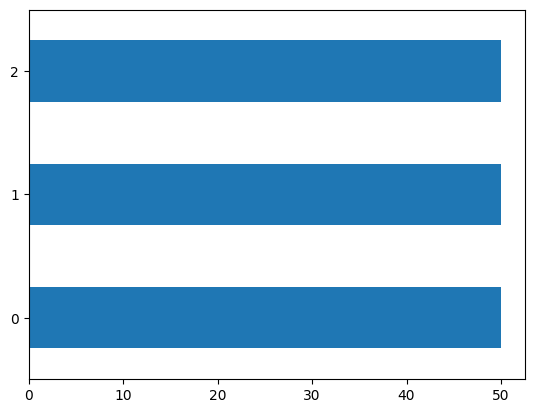

In [4]:
df.iloc[:, -1].value_counts().plot(kind = 'barh')
plt.show()

####Data Scaling

In [5]:
standard_scaler = StandardScaler()
independent_features = standard_scaler.fit_transform(df.iloc[:, :-1])
independent_features = pd.DataFrame(independent_features)
df = pd.concat([independent_features, df.iloc[:, -1]], axis = 1)
df.head()

,0,1,2,3,4,Species
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977,0


####Split the dataset into train and test

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [7]:
X.shape, y.shape

((150, 5), (150,))

####Model Building

In [8]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
import torch.optim as optim

In [9]:
"""Create a class and inherit the nn.Module from the parent class"""
class IrisClassifier(nn.Module):
  """Create a constructor which it will take number of input"""
  def __init__(self, input_dimension):
    """Call the super() class from the parent class"""
    super().__init__()

    """Create the first hidden layer and activation function(ReLU)
       input_features  = 5,
       output_features = 32
    """
    self.hiddenLayer1 = nn.Linear(in_features = input_dimension, out_features = 32)
    self.activation1  = nn.ReLU()
    """Create the second hidden layer and activation function(ReLU)
       input_features  = 32,
       output_features = 16
    """
    self.hiddenLayer2 = nn.Linear(in_features = 32, out_features = 16)
    self.activation2  = nn.ReLU()

    """Create the output layer and activation function (Softmax)
    input_features = 16,
    output_features = 3
    """
    self.outputLayer = nn.Linear(in_features = 16, out_features = 3)
    self.activation3 = nn.Softmax()

  def forward(self, x):
    x = self.activation1(self.hiddenLayer1(x))
    x = self.activation2(self.hiddenLayer2(x))
    x = self.activation3(self.outputLayer(x))

    return x

In [10]:
#### Call the class with number of input = 5
model = IrisClassifier(input_dimension = 5)
print(model.parameters)

<bound method Module.parameters of IrisClassifier(
  (hiddenLayer1): Linear(in_features=5, out_features=32, bias=True)
  (activation1): ReLU()
  (hiddenLayer2): Linear(in_features=32, out_features=16, bias=True)
  (activation2): ReLU()
  (outputLayer): Linear(in_features=16, out_features=3, bias=True)
  (activation3): Softmax(dim=None)
)>


In [11]:
#### Display the model summary()
summary(model = model, input_size = (150, 5))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 150, 32]             192
              ReLU-2              [-1, 150, 32]               0
            Linear-3              [-1, 150, 16]             528
              ReLU-4              [-1, 150, 16]               0
            Linear-5               [-1, 150, 3]              51
           Softmax-6               [-1, 150, 3]               0
Total params: 771
Trainable params: 771
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.12
Params size (MB): 0.00
Estimated Total Size (MB): 0.12
----------------------------------------------------------------


####Initialize the loss and optimizer

In [12]:
loss_function = nn.CrossEntropyLoss()
LEARNING_RATE = 0.001
optimizer = optim.Adam(params = model.parameters(), lr = LEARNING_RATE)

####KFold = 5

In [13]:
N_SPLIT = 5
BATCH_SIZE = 16
EPOCHS = 20
LOSS = {}
count, accuracy, precision, recall, f1 = 1, [], [], [], []
"""Initialize the KFold Cross Validation"""
Kfold = KFold(n_splits = N_SPLIT, shuffle = True, random_state = 42)

model.train()

for train_index, test_index in Kfold.split(X):
  print("*"*50, "CV {} is running ".format(count), "*"*50, "\n\n\n")
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  """Convert this dtype into tensor"""
  X_train = torch.tensor(data = X_train, dtype = torch.float32)
  X_test  = torch.tensor(data = X_test, dtype = torch.float32)
  """Create the DataLoader with batch_size = 32"""
  loader = DataLoader(dataset = list(zip(X_train, y_train)), batch_size = BATCH_SIZE, shuffle = True)

  """Initiate the EPOCHS : 50"""
  for epoch in range(EPOCHS):
    loss_calculate = []
    """Extract the X_batch and y_batch from the Loader"""
    for (X_batch, y_batch) in loader:
      prediction = model(X_batch)
      """Compute the loss function"""
      loss = loss_function(prediction, y_batch)
      loss_calculate.append(loss.item())
      """Initialize the Gradient"""
      optimizer.zero_grad()
      """Do the backward propagation with loss"""
      loss.backward()
      optimizer.step()
    print("For Epoch ## {} ###### Loss is = {} ###### accuracy is = {}".format(epoch + 1, np.array(loss_calculate).mean(),\
                                                                              accuracy_score(torch.argmax(prediction, dim = 1), y_batch)))

    """
    Store the Loss for Each Epoch
    """
  LOSS[count] = np.array(loss_calculate).mean()
  count+= 1

  """***********************************************************************************************************************"""
  """***********************************************************************************************************************"""
  """***********************************************************************************************************************"""

  """
    Compute/Evaluation the Testing
    1. ACCURACY
    2. PRECISION
    3. RECALL
    4. F1_SCORE
  """
  model.eval()
  """
    Pass the Testing data
  """
  predicted = model(X_test)
  predicted = torch.argmax(predicted, dim = 1)
  print("\n", "*"*50, " For Testing ", "*"*50)
  print("accuracy  #### {}".format(accuracy_score(predicted, y_test)).upper())
  print("precision #### {}".format(precision_score(predicted, y_test, average = 'macro')).upper())
  print("recall    #### {}".format(recall_score(predicted, y_test, average = 'macro')).upper())
  print("f1_score  #### {}".format(f1_score(predicted, y_test, average = 'macro')).upper())

  """
    Store all evaluation matrix to the list
  """
  accuracy.append(accuracy_score(predicted, y_test))
  precision.append(precision_score(predicted, y_test, average = 'macro'))
  recall.append(recall_score(predicted, y_test, average = 'macro'))
  f1.append(f1_score(predicted, y_test, average = 'macro'))
  print("\n", "="*120)
  print("="*120,'\n\n')

print("*"*50, " END !!!! ", "*"*50)

************************************************** CV 1 is running  ************************************************** 



For Epoch ## 1 ###### Loss is = 1.0986663699150085 ###### accuracy is = 0.875
For Epoch ## 2 ###### Loss is = 1.0869198441505432 ###### accuracy is = 0.25
For Epoch ## 3 ###### Loss is = 1.0711675435304642 ###### accuracy is = 0.5
For Epoch ## 4 ###### Loss is = 1.05177740752697 ###### accuracy is = 0.625
For Epoch ## 5 ###### Loss is = 1.0284828841686249 ###### accuracy is = 0.5
For Epoch ## 6 ###### Loss is = 1.0018172338604927 ###### accuracy is = 0.5
For Epoch ## 7 ###### Loss is = 0.9660824909806252 ###### accuracy is = 0.5
For Epoch ## 8 ###### Loss is = 0.9189039021730423 ###### accuracy is = 0.875
For Epoch ## 9 ###### Loss is = 0.8827956542372704 ###### accuracy is = 0.875
For Epoch ## 10 ###### Loss is = 0.8563454449176788 ###### accuracy is = 0.75
For Epoch ## 11 ###### Loss is = 0.8415662944316864 ###### accuracy is = 0.375
For Epoch ## 12 ###### Loss i

In [14]:
print("accuracy  = {}".format(np.array(accuracy).mean()).upper())
print("precision = {}".format(np.array(accuracy).mean()).upper())
print("recall    = {}".format(np.array(accuracy).mean()).upper())
print("f1_score  = {}".format(np.array(accuracy).mean()).upper())

ACCURACY  = 0.9933333333333334
PRECISION = 0.9933333333333334
RECALL    = 0.9933333333333334
F1_SCORE  = 0.9933333333333334


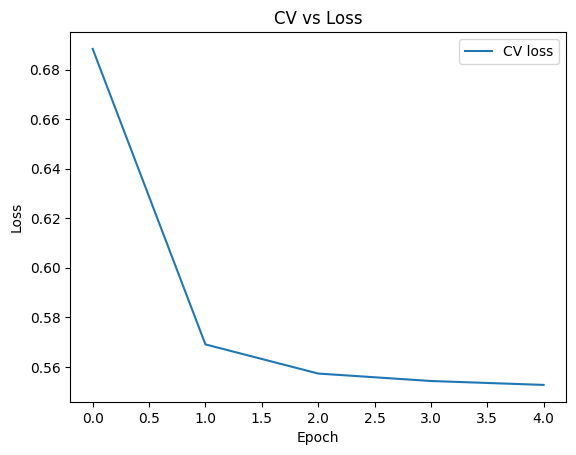

In [15]:
plt.title("CV vs Loss")
plt.plot(LOSS.values(), label = 'CV loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()